In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import sys

print(sys.executable)


/Users/zachnoriega/Desktop/CS418_Project/.venv/bin/python


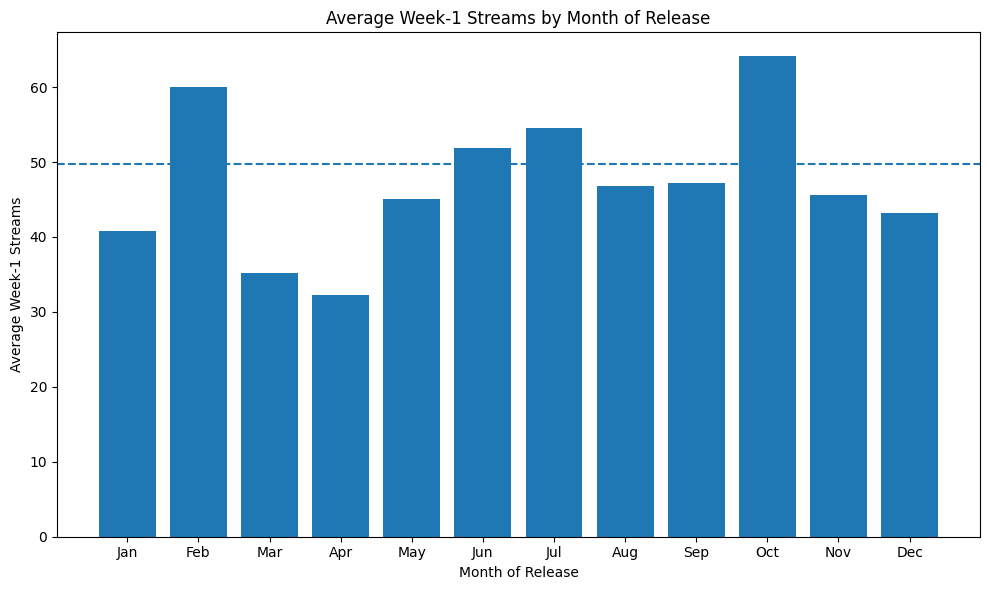

In [30]:
# Month labels for x-axis
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10, 6))

x_positions = range(12)

# Bar chart: average week1 streams per month
plt.bar(x_positions, month_group.values)

# Horizontal line: overall average
plt.axhline(overall_mean, linestyle='--')

plt.xticks(x_positions, month_labels)
plt.xlabel("Month of Release")
plt.ylabel("Average Week-1 Streams")
plt.title("Average Week-1 Streams by Month of Release")

plt.tight_layout()
plt.show()


In [8]:
df = pd.read_csv("data/raw/spotify_tracks.csv")

print(len(df))
df.head()


4389


,track_id,track_name,artist_id,artist_name,album_id,album_name,album_release_date,release_date_precision,popularity,duration_ms,explicit,source,source_id
0,1qwClaxDb5fCrLjXaAmB35,Wi$h Li$t - Settled Down Acoustic Version,06HL4z0CvFAxyc27GXpf02,Taylor Swift,6QNMhoV8V0u7cFuhhUBOn7,The Life of a Showgirl + Acoustic Collection,2025-11-07,day,67,210912,True,artist,Taylor Swift
1,53iuhJlwXhSER5J2IYYv1W,The Fate of Ophelia,06HL4z0CvFAxyc27GXpf02,Taylor Swift,4a6NzYL1YHRUgx9e3YZI6I,The Life of a Showgirl,2025-10-03,day,100,226073,False,artist,Taylor Swift
2,4UBWugj5D20ZveyzdGpqvD,Elizabeth Taylor - So Glamorous Cabaret Version,06HL4z0CvFAxyc27GXpf02,Taylor Swift,6QNMhoV8V0u7cFuhhUBOn7,The Life of a Showgirl + Acoustic Collection,2025-11-07,day,67,247268,False,artist,Taylor Swift
3,6hKfPNnVlA2cgTgKj6Vgcw,Ruin The Friendship - My Advice Version,06HL4z0CvFAxyc27GXpf02,Taylor Swift,6QNMhoV8V0u7cFuhhUBOn7,The Life of a Showgirl + Acoustic Collection,2025-11-07,day,64,222087,False,artist,Taylor Swift
4,2JHzTARFUispsjZHKhrxxO,Eldest Daughter - Now You’re Home Acoustic Ver...,06HL4z0CvFAxyc27GXpf02,Taylor Swift,6QNMhoV8V0u7cFuhhUBOn7,The Life of a Showgirl + Acoustic Collection,2025-11-07,day,62,244363,True,artist,Taylor Swift


In [9]:
df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')

# Drop rows where the date couldn't be parsed
df = df.dropna(subset=['album_release_date'])

print(len(df))
df[['album_release_date']].head()


4318


,album_release_date
0,2025-11-07
1,2025-10-03
2,2025-11-07
3,2025-11-07
4,2025-11-07


In [10]:
df = df[df['album_release_date'].dt.year == 2023]

print(len(df))
df[['album_release_date']].head()


496


,album_release_date
51,2023-11-29
61,2023-10-26
77,2023-07-07
102,2023-05-26
111,2023-10-26


In [11]:
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df = df.dropna(subset=['popularity'])

print(df['popularity'].describe())


count    496.000000
mean      49.721774
std       20.539472
min        3.000000
25%       40.750000
50%       51.000000
75%       67.000000
max       91.000000
Name: popularity, dtype: float64


In [12]:
df['month_of_release'] = df['album_release_date'].dt.month

df[['album_release_date', 'month_of_release', 'popularity']].head()


,album_release_date,month_of_release,popularity
51,2023-11-29,11,74
61,2023-10-26,10,75
77,2023-07-07,7,77
102,2023-05-26,5,70
111,2023-10-26,10,71


In [13]:
# Average popularity per month
month_group = df.groupby('month_of_release')['popularity'].mean()

# Make sure we have one entry for each month 1–12 (missing months become NaN)
month_index = np.arange(1, 13)
month_group = month_group.reindex(month_index)

# Overall average popularity
overall_mean = df['popularity'].mean()

month_group, overall_mean


(month_of_release
 1     40.800000
 2     60.058824
 3     35.153846
 4     32.305556
 5     45.104167
 6     51.850000
 7     54.545455
 8     46.781250
 9     47.224490
 10    64.107692
 11    45.576923
 12    43.200000
 Name: popularity, dtype: float64,
 np.float64(49.721774193548384))

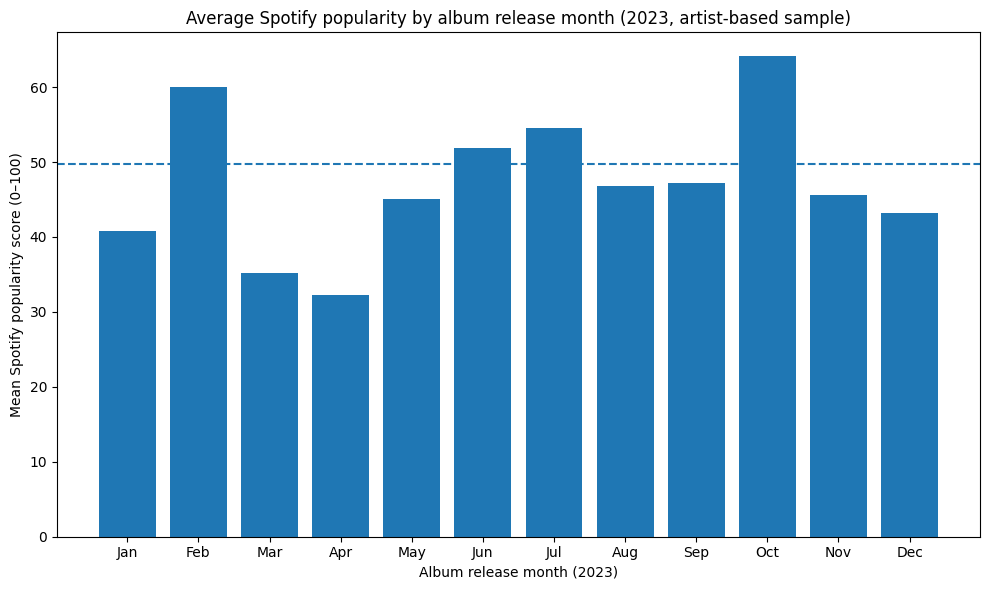

In [14]:
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10, 6))
x_positions = range(12)

# Bars: average popularity per month (2023 releases in our artist sample)
plt.bar(x_positions, month_group.values)

# Dashed line: overall mean popularity across all 2023 tracks in our sample
plt.axhline(overall_mean, linestyle='--')

plt.xticks(x_positions, month_labels)

plt.xlabel("Album release month (2023)")
plt.ylabel("Mean Spotify popularity score (0–100)")
plt.title("Average Spotify popularity by album release month (2023, artist-based sample)")

plt.tight_layout()
plt.show()


In [15]:
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Build a list where each element is the popularity values for that month
box_data = []
for m in range(1, 13):
    month_vals = df.loc[df['month_of_release'] == m, 'popularity'].dropna()
    box_data.append(month_vals)


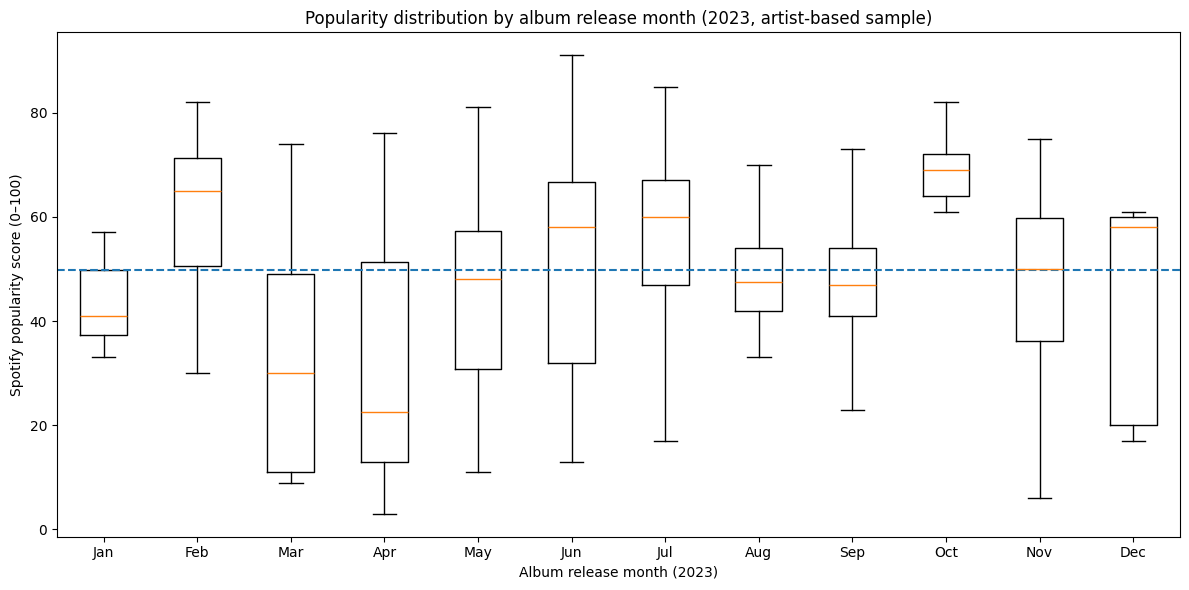

In [17]:
plt.figure(figsize=(12, 6))

plt.boxplot(
    box_data,
    tick_labels=month_labels,
    showfliers=False  # hides extreme outliers so the boxes are readable
)

# Optional: overall mean reference line (same idea as your V1)
overall_mean = df['popularity'].mean()
plt.axhline(overall_mean, linestyle='--')

plt.xlabel("Album release month (2023)")
plt.ylabel("Spotify popularity score (0–100)")
plt.title("Popularity distribution by album release month (2023, artist-based sample)")

plt.tight_layout()
plt.show()


In [15]:
import numpy as np
import pandas as pd

# Start from your cleaned df that already has:
# album_release_date (datetime), popularity (numeric), month_of_release
# If you're not sure, re-run your cleaning here:

df = pd.read_csv("data/raw/spotify_tracks.csv")

df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')
df = df.dropna(subset=['album_release_date'])

# Focus on 2023 releases
df = df[df['album_release_date'].dt.year == 2023]

df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df = df.dropna(subset=['popularity'])

df['month_of_release'] = df['album_release_date'].dt.month

# Make sure duration_ms and explicit are usable
df['duration_ms'] = pd.to_numeric(df['duration_ms'], errors='coerce')
df['explicit'] = df['explicit'].map({True: 1, False: 0, 'True': 1, 'False': 0, 1: 1, 0: 0})

# Drop rows missing these
df_ml = df.dropna(subset=['duration_ms', 'explicit', 'month_of_release', 'popularity']).copy()

print(len(df_ml))
df_ml[['track_name', 'artist_name', 'album_release_date', 'month_of_release', 'popularity']].head()


496


,track_name,artist_name,album_release_date,month_of_release,popularity
51,You’re Losing Me (From The Vault),Taylor Swift,2023-11-29,11,74
61,Out Of The Woods (Taylor's Version),Taylor Swift,2023-10-26,10,75
77,Enchanted (Taylor's Version),Taylor Swift,2023-07-07,7,77
102,Hits Different,Taylor Swift,2023-05-26,5,70
111,Now That We Don't Talk (Taylor's Version) (Fro...,Taylor Swift,2023-10-26,10,71


In [16]:
# Target: log popularity (proxy for early success)
df_ml['log_popularity'] = np.log1p(df_ml['popularity'])

# One-hot encode month (drop first as reference month)
month_dummies = pd.get_dummies(df_ml['month_of_release'], prefix='month', drop_first=True)

# Numeric features: duration + explicit flag
numeric_features = df_ml[['duration_ms', 'explicit']]

# Combine everything into X
X = pd.concat([numeric_features, month_dummies], axis=1)
y = df_ml['log_popularity']

X.head(), y.head()


(     duration_ms  explicit  month_2  month_3  month_4  month_5  month_6  \
 51        277831         0    False    False    False    False    False   
 61        235800         0    False    False    False    False    False   
 77        353253         0    False    False    False    False    False   
 102       234466         1    False    False    False     True    False   
 111       146436         0    False    False    False    False    False   
 
      month_7  month_8  month_9  month_10  month_11  month_12  
 51     False    False    False     False      True     False  
 61     False    False    False      True     False     False  
 77      True    False    False     False     False     False  
 102    False    False    False     False     False     False  
 111    False    False    False      True     False     False  ,
 51     4.317488
 61     4.330733
 77     4.356709
 102    4.262680
 111    4.276666
 Name: log_popularity, dtype: float64)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 80% train, 20% validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Baseline: always predict the mean of y_train
baseline_pred = np.full_like(y_val, fill_value=y_train.mean())

baseline_mse = mean_squared_error(y_val, baseline_pred)
baseline_mse


0.30569785576898545

In [19]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_val)
linreg_mse = mean_squared_error(y_val, y_pred)

baseline_mse, linreg_mse


(0.30569785576898545, 0.252969399034234)

In [20]:
coef_series = pd.Series(linreg.coef_, index=X.columns)
coef_series.sort_values()


month_4       -0.568663
month_3       -0.311322
month_11      -0.179670
month_12      -0.032137
month_9       -0.013635
month_8       -0.009629
month_6       -0.002307
duration_ms    0.000002
month_5        0.117249
month_7        0.140469
month_10       0.236951
month_2        0.241802
explicit       0.295918
dtype: float64

In [18]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [21]:
df = pd.read_csv("data/raw/spotify_tracks.csv")

# Parse release date and restrict to 2023
df["album_release_date"] = pd.to_datetime(df["album_release_date"], errors="coerce")
df = df.dropna(subset=["album_release_date"])
df = df[df["album_release_date"].dt.year == 2023].copy()

# Numeric conversions
df["popularity"] = pd.to_numeric(df["popularity"], errors="coerce")
df["duration_ms"] = pd.to_numeric(df["duration_ms"], errors="coerce")

# Explicit -> 0/1 (handle mixed types)
df["explicit"] = df["explicit"].map({True: 1, False: 0, "True": 1, "False": 0, 1: 1, 0: 0})

# Keep rows with needed fields
df = df.dropna(subset=["popularity", "duration_ms", "explicit"]).copy()

# Month feature
df["month"] = df["album_release_date"].dt.month


In [22]:
# Hit label = top 25% popularity
hit_threshold = df["popularity"].quantile(0.75)
df["is_hit"] = (df["popularity"] >= hit_threshold).astype(int)

# One-hot month (drop_first=True sets a reference month)
month_dummies = pd.get_dummies(df["month"], prefix="month", drop_first=True)

X = pd.concat([df[["duration_ms", "explicit"]], month_dummies], axis=1)
y = df["is_hit"]


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Baseline: always predict majority class
majority_class = y_train.mode()[0]
baseline_pred = np.full_like(y_test, fill_value=majority_class)

baseline = {
    "model": "Baseline (majority)",
    "accuracy": accuracy_score(y_test, baseline_pred),
    "precision_hit": precision_score(y_test, baseline_pred, pos_label=1, zero_division=0),
    "recall_hit": recall_score(y_test, baseline_pred, pos_label=1, zero_division=0),
    "f1_hit": f1_score(y_test, baseline_pred, pos_label=1, zero_division=0),
    "confusion": confusion_matrix(y_test, baseline_pred)
}
baseline


{'model': 'Baseline (majority)',
 'accuracy': 0.74,
 'precision_hit': 0.0,
 'recall_hit': 0.0,
 'f1_hit': 0.0,
 'confusion': array([[74,  0],
        [26,  0]])}

In [24]:
def evaluate(name, y_true, y_pred):
    return {
        "model": name,
        "accuracy": accuracy_score(y_true, y_pred),
        "precision_hit": precision_score(y_true, y_pred, pos_label=1, zero_division=0),
        "recall_hit": recall_score(y_true, y_pred, pos_label=1, zero_division=0),
        "f1_hit": f1_score(y_true, y_pred, pos_label=1, zero_division=0),
        "confusion": confusion_matrix(y_true, y_pred)
    }

# Logistic Regression pipeline
log_model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=2000))
])

log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
log_res = evaluate("Logistic Regression", y_test, log_pred)

# kNN pipeline (try a couple k values, pick best)
knn_results = []
for k in [3, 5, 11]:
    knn_model = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier(n_neighbors=k))
    ])
    knn_model.fit(X_train, y_train)
    knn_pred = knn_model.predict(X_test)
    knn_results.append(evaluate(f"kNN (k={k})", y_test, knn_pred))

log_res, knn_results[:1]


({'model': 'Logistic Regression',
  'accuracy': 0.77,
  'precision_hit': 0.5882352941176471,
  'recall_hit': 0.38461538461538464,
  'f1_hit': 0.46511627906976744,
  'confusion': array([[67,  7],
         [16, 10]])},
 [{'model': 'kNN (k=3)',
   'accuracy': 0.77,
   'precision_hit': 0.5789473684210527,
   'recall_hit': 0.4230769230769231,
   'f1_hit': 0.4888888888888889,
   'confusion': array([[66,  8],
          [15, 11]])}])

In [25]:
rows = [baseline, log_res] + knn_results
summary = pd.DataFrame([{k:v for k,v in r.items() if k != "confusion"} for r in rows])
summary


,model,accuracy,precision_hit,recall_hit,f1_hit
0,Baseline (majority),0.74,0.000000,0.000000,0.000000
1,Logistic Regression,0.77,0.588235,0.384615,0.465116
2,kNN (k=3),0.77,0.578947,0.423077,0.488889
3,kNN (k=5),0.74,0.500000,0.192308,0.277778
4,kNN (k=11),0.77,0.666667,0.230769,0.342857


In [26]:
for r in rows:
    print("\n", r["model"])
    print("Confusion matrix:\n", r["confusion"])



 Baseline (majority)
Confusion matrix:
 [[74  0]
 [26  0]]

 Logistic Regression
Confusion matrix:
 [[67  7]
 [16 10]]

 kNN (k=3)
Confusion matrix:
 [[66  8]
 [15 11]]

 kNN (k=5)
Confusion matrix:
 [[69  5]
 [21  5]]

 kNN (k=11)
Confusion matrix:
 [[71  3]
 [20  6]]


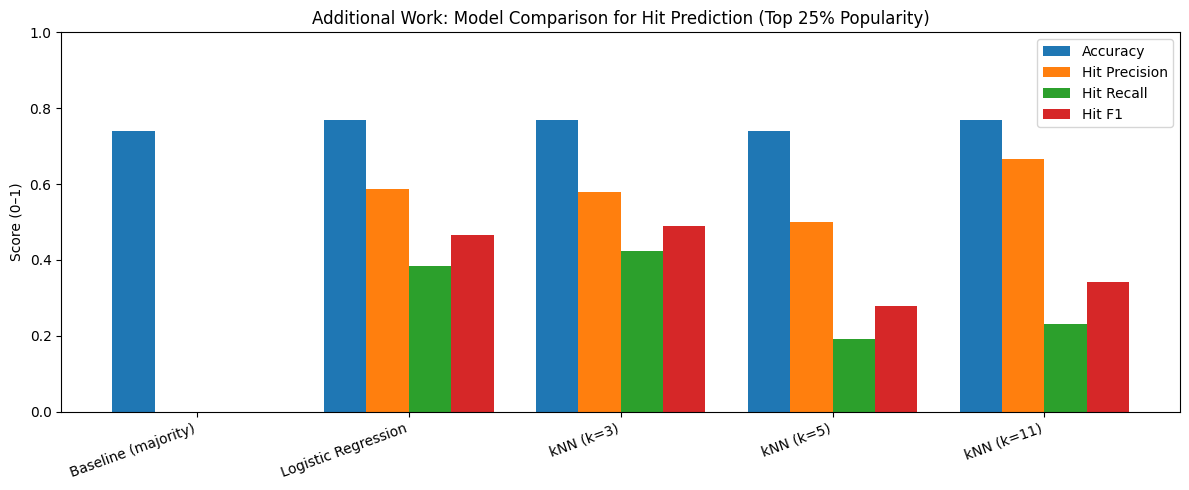

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Safety: if summary isn't defined, create it from your numbers (edit if needed)
try:
    summary
except NameError:
    import pandas as pd
    summary = pd.DataFrame([
        {"model":"Baseline (majority)", "accuracy":0.74, "precision_hit":0.0, "recall_hit":0.0, "f1_hit":0.0},
        {"model":"Logistic Regression", "accuracy":0.77, "precision_hit":0.588235, "recall_hit":0.384615, "f1_hit":0.465116},
        {"model":"kNN (k=3)", "accuracy":0.77, "precision_hit":0.578947, "recall_hit":0.423077, "f1_hit":0.488889},
        {"model":"kNN (k=5)", "accuracy":0.74, "precision_hit":0.5, "recall_hit":0.192308, "f1_hit":0.277778},
        {"model":"kNN (k=11)", "accuracy":0.77, "precision_hit":0.666667, "recall_hit":0.230769, "f1_hit":0.342857},
    ])

metrics = ["accuracy", "precision_hit", "recall_hit", "f1_hit"]
labels  = ["Accuracy", "Hit Precision", "Hit Recall", "Hit F1"]

x = np.arange(len(summary["model"]))
width = 0.2

plt.figure(figsize=(12, 5))
for i, m in enumerate(metrics):
    plt.bar(x + i*width, summary[m].values, width=width, label=labels[i])

plt.xticks(x + width*1.5, summary["model"], rotation=20, ha="right")
plt.ylim(0, 1)
plt.ylabel("Score (0–1)")
plt.title("Additional Work: Model Comparison for Hit Prediction (Top 25% Popularity)")
plt.legend()
plt.tight_layout()
plt.show()
